# FordGoBike 



Here, we will analyse and visualise FordGoBike dataset March 2019. This dataset contains infomation about each trip (anonimized).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

The data is loaded into a dataframe from 'fordgobike-tripdata-2019.csv'

In [2]:
fgb = pd.read_csv('fordgobike-tripdata-2019.csv')

In [3]:
fgb.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,53588,2019-03-31 20:59:21.8780,2019-04-01 11:52:30.2000,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,6803,Subscriber,1980.0,Other,No
1,74305,2019-03-31 13:56:46.0050,2019-04-01 10:35:11.4540,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,233.0,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,6415,Subscriber,1990.0,Male,No
2,79789,2019-03-31 11:48:34.2010,2019-04-01 09:58:23.8240,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,345.0,Hubbell St at 16th St,37.766483,-122.398279,2317,Customer,NaN,NaN,No
3,59315,2019-03-31 16:48:54.3740,2019-04-01 09:17:30.1540,92.0,Mission Bay Kids Park,37.772301,-122.393028,49.0,S Park St at 3rd St,37.780760,-122.394989,6631,Customer,1996.0,Female,No
4,47886,2019-03-31 19:54:24.1480,2019-04-01 09:12:30.8170,339.0,Jackson St at 11th St,37.800002,-122.266438,18.0,Telegraph Ave at Alcatraz Ave,37.850222,-122.260172,5241,Subscriber,1974.0,Female,No


In [4]:
#Structure of the dataframe
fgb.shape

(256299, 16)

### Assessing data

In [5]:
fgb.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,256299.000000,256078.000000,256299.000000,256299.000000,256078.000000,256299.000000,256299.000000,256299.000000,244576.000000
mean,807.873831,141.352424,37.771769,-122.356164,140.011317,37.771933,-122.355815,4916.572531,1984.989050
std,2056.305336,115.408300,0.097027,0.114907,115.386716,0.096979,0.114620,1687.339951,10.077825
min,61.000000,3.000000,37.315158,-122.453704,3.000000,37.315158,-122.453704,11.000000,1878.000000
25%,338.000000,47.000000,37.770083,-122.415204,44.000000,37.770407,-122.413004,4525.000000,1980.000000
50%,542.000000,104.000000,37.780787,-122.398870,102.000000,37.781010,-122.398525,5369.000000,1987.000000
75%,854.000000,240.000000,37.797280,-122.293528,239.000000,37.797320,-122.293528,6127.000000,1992.000000
max,85676.000000,407.000000,37.880222,-121.874119,407.000000,37.880222,-121.874119,7082.000000,2001.000000


In [6]:
fgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256299 entries, 0 to 256298
Data columns (total 16 columns):
duration_sec               256299 non-null int64
start_time                 256299 non-null object
end_time                   256299 non-null object
start_station_id           256078 non-null float64
start_station_name         256078 non-null object
start_station_latitude     256299 non-null float64
start_station_longitude    256299 non-null float64
end_station_id             256078 non-null float64
end_station_name           256078 non-null object
end_station_latitude       256299 non-null float64
end_station_longitude      256299 non-null float64
bike_id                    256299 non-null int64
user_type                  256299 non-null object
member_birth_year          244576 non-null float64
member_gender              244576 non-null object
bike_share_for_all_trip    256299 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 24.4+ MB


### Univariate Exploration

1. On which day of the week do people take more number of trips.

To do this, we shall create another column named 'weekday' using 'start_time'.

In [7]:
li = []
for i in range(len(fgb)):
    li.append(datetime.datetime.strptime(fgb.start_time[i][:-5],'%Y-%m-%d %H:%M:%S').strftime('%A'))

In [8]:
fgb['weekday'] = li

In [9]:
fgb.weekday.value_counts()

Friday       45233
Thursday     41665
Tuesday      39589
Monday       37208
Wednesday    36979
Saturday     27880
Sunday       27745
Name: weekday, dtype: int64

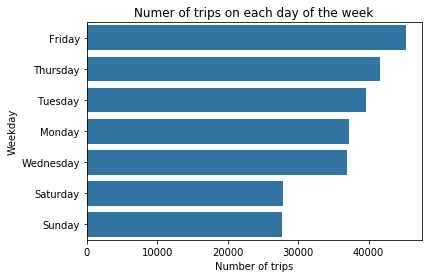

In [10]:
color = sb.color_palette()[0]
order = fgb.weekday.value_counts().index
sb.countplot(data=fgb,y='weekday',order=order,color=color);
plt.title('Numer of trips on each day of the week');
plt.xlabel('Number of trips');
plt.ylabel('Weekday');

**Insights**

From the plot, it is evident that most number of trips are recorded on Friday(45233).

As expected, lowest number of trips are recorded during weekend (Saturday and Sunday) as people like to chill out / rest at home.

## Bivariate Exploration

1. In this section, we investigate relationship between user type and their average trip duration.

In [11]:
#New column duration_min is created from duration_sec to make analysis easier.
fgb['duration_min'] = fgb['duration_sec']/60
fgb['duration_min'] = ['{0:.2f}'.format(i) for i in fgb.duration_min]
fgb.duration_min = fgb.duration_min.astype('float')

In [12]:
fgb.duration_min.dtype

dtype('float64')

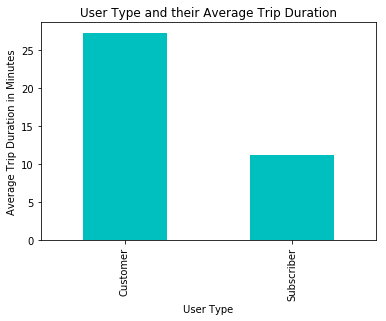

In [13]:
user_dur = fgb.groupby('user_type')['duration_min'].mean()
user_dur.plot(kind='bar',title='User Type and their Average Trip Duration',color='c');
plt.xlabel('User Type');
plt.ylabel('Average Trip Duration in Minutes');

**Insights**

From the plot it is evident that people who have not subscribed(Customers) take longer trips compared to that of Subscribers. 

The average trip duration is ~27 mins and ~11 minutes for Customers and Subscribers respectively. 

In [14]:
#Dropping duration_sec column as we will consider duration_min for analysis
fgb.drop(columns=['duration_sec'],inplace=True)

2. Here, we will find the average trip duration among different age groups.

In [15]:
#Here, we will consider only not null values of member_birth_year
fgb_year = fgb[fgb['member_birth_year'].notnull()]

In [16]:
fgb_year.member_birth_year = fgb_year['member_birth_year'].astype(int)

H:\anaconda\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [17]:
#Since rows are filtered, indices need to be reset inorder to perform next operation
fgb_year.reset_index(drop=True,inplace=True)

In [18]:
#We will create another column age_group which is obtained by subtracting 2019 from member_birth_year.
age_group = []
for i in range(len(fgb_year)):
    temp = fgb_year.member_birth_year[i]
    if(temp > 1999):
        age_group.append('Less than 20')
    elif(temp > 1978):
        age_group.append('20-40')
    elif(temp > 1958):
        age_group.append('40-60')
    else:
        age_group.append('More than 60')

fgb_year['age_group'] = age_group

H:\anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
fgb_year.age_group.value_counts()

20-40           191731
40-60            45895
More than 60      4593
Less than 20      2357
Name: age_group, dtype: int64

In [20]:
age_dur = fgb_year.groupby('age_group')['duration_min'].mean()

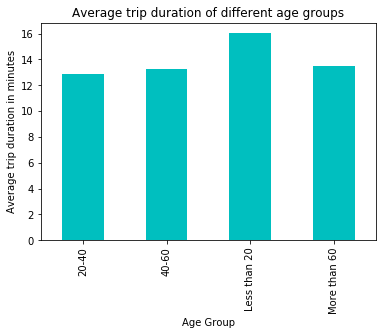

In [21]:
age_dur.plot(kind='bar',title='Average trip duration of different age groups',color='c');
plt.xlabel('Age Group');
plt.ylabel('Average trip duration in minutes');

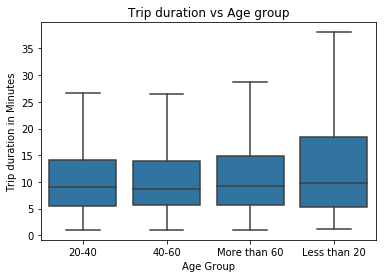

In [22]:
sb.boxplot(data=fgb_year,x='age_group',y='duration_min',showfliers=False,color=sb.color_palette()[0]);
plt.title('Trip duration vs Age group');
plt.xlabel('Age Group');
plt.ylabel('Trip duration in Minutes');

**Insights**

From the plot it is evident that

- People of age less than 20(Kids and Teens) take longer trips.
- People of age between 20-40(Youth) take shorter trips compared to all other age groups.
- Mean trip duration of Kids and Teens is 16 minutes.
- The range of trip duration is also high for Kids and Teens.
- Average trip duration for different age groups are as follows:
    - Less than 20 : 16 minutes
    - 20 - 40 : 12.85 minutes
    - 40 - 60 : 13.28 minutes
    - More than 60 : 13.44 minutes

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [46]:
np.random.seed(450)
sample = np.random.choice(fgb_year.shape[0],400,replace=True)
fgb_sample = fgb_year.loc[sample]

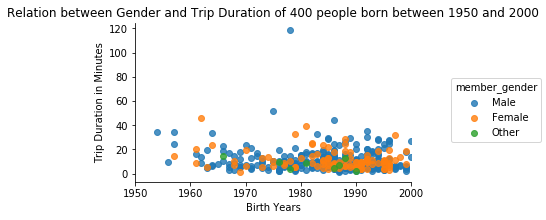

In [64]:
g=sb.FacetGrid(data=fgb_sample,hue='member_gender',aspect=1.6);
g.map(sb.regplot,'member_birth_year','duration_min',fit_reg=False);
plt.xlim(1950,2000);
g.add_legend();
plt.title('Relation between Gender and Trip Duration of 400 people born between 1950 and 2000');
plt.xlabel('Birth Years');
plt.ylabel('Trip Duration in Minutes');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!